In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("project_data.csc")
df = pd.read_csv("project_data.csc")

In [3]:

data

,Unnamed: 0,Prop_Name,Builder,Location,Price,Area,Prc_Sqft,Status,Bathrooms
0,0,3 BHK Apartment,seller,Gandi Maisamma,62 L,1500,"4,133 / sq ft",Under Construction,3 Bathrooms
1,1,Residential Plot in MMR constructions,Murali,Kanuru,54.39 L,1305,"4,168 / sq ft",New,Not mentioned
2,2,Residential Plot in MGP Harmony,MGP Builders and Devlopers,Thoraipakkam OMR,69.6 L,1200,"5,800 / sq ft",New,Not mentioned
3,3,4 BHK Apartment in Mahaveer Crystal Garden,Mahaveer Group,Attapur,3.52 Cr,4706,"7,500 / sq ft",Under Construction,Not mentioned
4,4,2 BHK Apartment in Navami Landmaark,Navami Builders and Developers,RR Nagar,1.02 Cr,1240,"8,305 / sq ft",Under Construction,2 Bathrooms
...,...,...,...,...,...,...,...,...,...
3387,3387,2 BHK Apartment in Reputed Builder Apartment,seller,Choolaimedu,55 L,1000,"5,500 / sq ft",Under Construction,2 Bathrooms
3388,3388,3 BHK Apartment in Bharathi Sai Hazel Apartment,Bharathi Construction,Anakaputhur,67.73 L,1178,"5,750 / sq ft",Under Construction,Not mentioned
3389,3389,9 BHK Independent House,seller,GB Palya,1.5 Cr,4500,"3,333 / sq ft",Ready to move,9 Bathrooms
3390,3390,3 BHK Villa,Maaruthi Group,Bowrampet,1.67 Cr,2370,"7,046 / sq ft",Ready to move,3 Bathrooms


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3392 non-null   int64 
 1   Prop_Name   3392 non-null   object
 2   Builder     3392 non-null   object
 3   Location    3392 non-null   object
 4   Price       3392 non-null   object
 5   Area        3392 non-null   int64 
 6   Prc_Sqft    3392 non-null   object
 7   Status      3392 non-null   object
 8   Bathrooms   3392 non-null   object
dtypes: int64(2), object(7)
memory usage: 238.6+ KB


In [5]:
data['Area'] = [int(x) for x in data['Area']]

In [6]:
price = data['Price']

def convert_price_to_float(price_str):
    p=price_str
    price_str = price_str.replace('L', '').replace('Cr', '')  # Remove 'L' and 'Cr' from the string
    price_float = float(price_str)  # Convert the remaining string to a float
    if 'L' in p:
        price_int = int(price_float * 100000) # Convert lakhs to rupees
    elif 'Cr' in p:
        price_int = int(price_float * 10000000)  # Convert crores to rupees
    else:
        price_int = int(price_float) # If no unit is specified, assume rupees
    return price_int

float_price = [convert_price_to_float(p) for p in price]

data['Price']=float_price

In [7]:
price =  data["Prc_Sqft"]

def convert_price_to_int(price_str):
    price_str = price_str.replace(',', '')  # Remove commas from the string
    price_str = price_str.replace('/ sq ft', '').strip()  # Remove "/ sq ft" and leading/trailing spaces
    price_int = int(price_str)  # Convert the remaining string to an integer
    return price_int

int_price = [convert_price_to_int(p) for p in price]

data['Prc_Sqft']=int_price

In [8]:
# Define the manual encoding mappings
status_encoding = {
    'Under Construction': 3,
    'Ready to move': 1,
    'New': 0,
    'Resale': 2
}

# Encode the "Status" column based on the manual mappings
data['Status'] = data['Status'].map(status_encoding)

# Print the encoded values
print(data['Status'])

0       3
1       0
2       0
3       3
4       3
       ..
3387    3
3388    3
3389    1
3390    1
3391    2
Name: Status, Length: 3392, dtype: int64


In [9]:
data['Bathrooms'].unique()

array(['3 Bathrooms', 'Not mentioned', '2 Bathrooms', '4 Bathrooms',
       '1 Bathrooms', '6 Bathrooms', '9 Bathrooms', '8 Bathrooms',
       '7 Bathrooms', '5 Bathrooms'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Status', 'Bathrooms', 'Location']
encoders = {}
for column in columns_to_encode:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    encoders[column] = encoder

In [11]:
data.describe()

,Unnamed: 0,Location,Price,Area,Prc_Sqft,Status,Bathrooms
count,3392.000000,3392.000000,3.392000e+03,3392.000000,3392.000000,3392.000000,3392.000000
mean,1695.500000,293.885908,9.576837e+06,1810.808373,5245.514151,1.549528,6.286262
std,979.330383,168.609820,1.062346e+07,1382.794596,3308.318821,1.196880,3.640634
min,0.000000,0.000000,1.800000e+05,25.000000,105.000000,0.000000,0.000000
25%,847.750000,139.000000,3.800000e+06,1125.000000,2777.000000,1.000000,2.000000
50%,1695.500000,281.000000,6.500000e+06,1467.000000,5200.000000,1.000000,9.000000
75%,2543.250000,430.000000,1.060000e+07,1910.000000,6999.000000,3.000000,9.000000
max,3391.000000,597.000000,1.498000e+08,20000.000000,42000.000000,3.000000,9.000000


In [12]:
data.corr().round(3)

,Unnamed: 0,Location,Price,Area,Prc_Sqft,Status,Bathrooms
Unnamed: 0,1.000,-0.003,0.018,0.042,-0.005,-0.022,0.009
Location,-0.003,1.000,-0.014,-0.066,0.064,0.133,-0.054
Price,0.018,-0.014,1.000,0.599,0.616,0.206,0.001
Area,0.042,-0.066,0.599,1.000,0.019,-0.021,0.169
Prc_Sqft,-0.005,0.064,0.616,0.019,1.000,0.343,-0.187
Status,-0.022,0.133,0.206,-0.021,0.343,1.000,-0.080
Bathrooms,0.009,-0.054,0.001,0.169,-0.187,-0.080,1.000


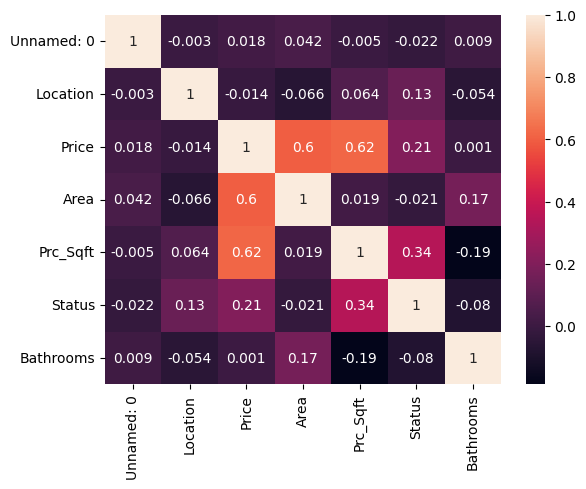

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr().round(3),annot = True )
plt.show()

In [14]:
import plotly.express as px
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import cufflinks as cf


from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [15]:
fig = px.scatter(data, x=df['Status'], y='Price')
fig.show() 

In [16]:
fig = px.scatter(data, x='Area', y='Price',color='Location')
fig.show() 

In [17]:
fig = px.scatter(data, x='Area', y='Price',animation_frame=df['Status'],color='Location')
fig.show() 

In [18]:
fig = px.scatter(data, x=df['Bathrooms'], y='Price')
fig.show() 

In [19]:
fig = px.scatter(data, x='Area', y='Price',animation_frame=df['Status'],color=df['Location'],height = 600)
fig.show() 

In [20]:
fig = px.scatter(data, x='Prc_Sqft', y='Price',animation_frame=df['Status'],height=600)
fig.show() 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3392 non-null   int64 
 1   Prop_Name   3392 non-null   object
 2   Builder     3392 non-null   object
 3   Location    3392 non-null   int32 
 4   Price       3392 non-null   int64 
 5   Area        3392 non-null   int64 
 6   Prc_Sqft    3392 non-null   int64 
 7   Status      3392 non-null   int64 
 8   Bathrooms   3392 non-null   int32 
dtypes: int32(2), int64(5), object(2)
memory usage: 212.1+ KB


In [22]:
print(df['Status'].value_counts())
print(data['Status'].value_counts())

Under Construction    1194
Ready to move         1092
New                    815
Resale                 291
Name: Status, dtype: int64
3    1194
1    1092
0     815
2     291
Name: Status, dtype: int64


In [23]:
data

,Unnamed: 0,Prop_Name,Builder,Location,Price,Area,Prc_Sqft,Status,Bathrooms
0,0,3 BHK Apartment,seller,136,6200000,1500,4133,3,2
1,1,Residential Plot in MMR constructions,Murali,239,5439000,1305,4168,0,9
2,2,Residential Plot in MGP Harmony,MGP Builders and Devlopers,526,6959999,1200,5800,0,9
3,3,4 BHK Apartment in Mahaveer Crystal Garden,Mahaveer Group,30,35200000,4706,7500,3,9
4,4,2 BHK Apartment in Navami Landmaark,Navami Builders and Developers,436,10200000,1240,8305,3,1
...,...,...,...,...,...,...,...,...,...
3387,3387,2 BHK Apartment in Reputed Builder Apartment,seller,106,5500000,1000,5500,3,1
3388,3388,3 BHK Apartment in Bharathi Sai Hazel Apartment,Bharathi Construction,18,6773000,1178,5750,3,9
3389,3389,9 BHK Independent House,seller,131,15000000,4500,3333,1,8
3390,3390,3 BHK Villa,Maaruthi Group,84,16700000,2370,7046,1,2


In [24]:
x=data.drop(columns = ['Unnamed: 0','Price','Prop_Name','Builder'],axis =1)
y=data['Price']

In [25]:
print("input:")
print(x)
print("Output")
print(y)

input:
      Location  Area  Prc_Sqft  Status  Bathrooms
0          136  1500      4133       3          2
1          239  1305      4168       0          9
2          526  1200      5800       0          9
3           30  4706      7500       3          9
4          436  1240      8305       3          1
...        ...   ...       ...     ...        ...
3387       106  1000      5500       3          1
3388        18  1178      5750       3          9
3389       131  4500      3333       1          8
3390        84  2370      7046       1          2
3391       103  1500       666       2          9

[3392 rows x 5 columns]
Output
0        6200000
1        5439000
2        6959999
3       35200000
4       10200000
          ...   
3387     5500000
3388     6773000
3389    15000000
3390    16700000
3391     1000000
Name: Price, Length: 3392, dtype: int64


In [26]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2, random_state= 42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (2713, 5)
X_test dimension=  (679, 5)
y_train dimension=  (2713,)
y_test dimension=  (679,)


In [27]:
from sklearn.ensemble import ExtraTreesRegressor
Etree_reg = ExtraTreesRegressor(n_estimators=300, random_state=42).fit(X_train, y_train)

In [28]:
Etree_reg.score(X_train, y_train)

0.9999999991838444

In [29]:
Etree_reg.score(X_test, y_test)

0.993711916507015

In [30]:
y_pred = Etree_reg.predict(X_test)

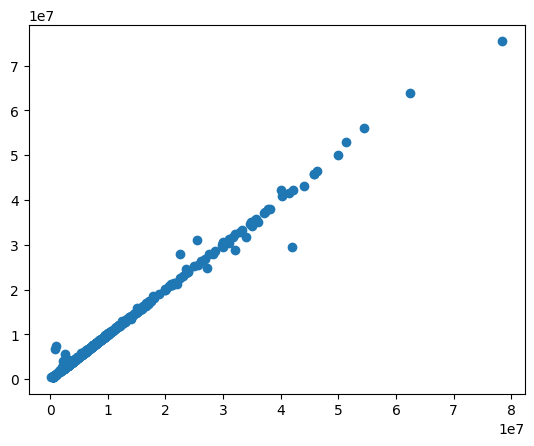

In [31]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [32]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
134,9187000,9.213587e+06,-26586.666667
785,3589000,3.589000e+06,0.000000
1606,1955000,1.980657e+06,-25656.660000
1988,4550000,4.323577e+06,226423.333333
1128,9000000,8.987638e+06,12361.666667
...,...,...,...
1053,2599000,2.614243e+06,-15243.333333
1620,3589000,3.589000e+06,0.000000
2318,40300000,4.092833e+07,-628332.720000
2236,20000000,1.980981e+07,190190.043333


In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [34]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.993711916507015
mean_absolute_error = 150938.85877270493
mean_squared_error = 530245492046.68463
mean_absolute_percentage_error = 0.03871749804218044


In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( random_state=52)
regr.fit(X_train ,y_train)

RandomForestRegressor(random_state=52)

In [36]:
regr.score(X_train, y_train)

0.9962751688101007

In [37]:
regr.score(X_test, y_test)

0.9843327999652348

In [38]:
y_pred = regr.predict(X_test)

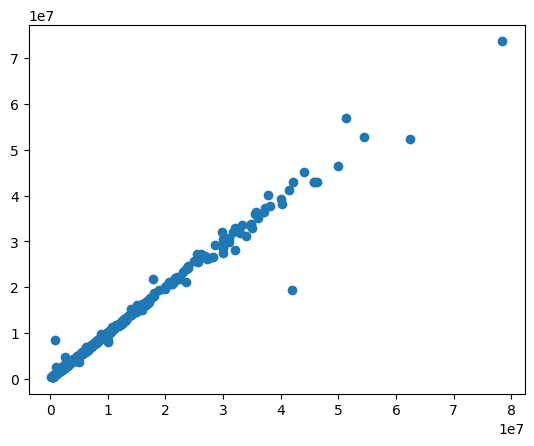

In [39]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [40]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
134,9187000,9244390.00,-57390.00
785,3589000,3589000.00,0.00
1606,1955000,2005429.95,-50429.95
1988,4550000,4325650.00,224350.00
1128,9000000,9028720.00,-28720.00
...,...,...,...
1053,2599000,2603240.00,-4240.00
1620,3589000,3589000.00,0.00
2318,40300000,38234999.71,2065000.29
2236,20000000,19592999.94,407000.06


In [41]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.9843327999652348
mean_absolute_error = 258827.49036818848
mean_squared_error = 1321143747645.161
mean_absolute_percentage_error = 0.038827693485731014


In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
regressor = DecisionTreeRegressor(random_state=52)
regressor.fit(X_train ,y_train)

DecisionTreeRegressor(random_state=52)

In [44]:
regressor.score(X_train, y_train)

0.9999999999913886

In [45]:
regressor.score(X_test, y_test)

0.9784885585263061

In [46]:
y_pred = regressor.predict(X_test)

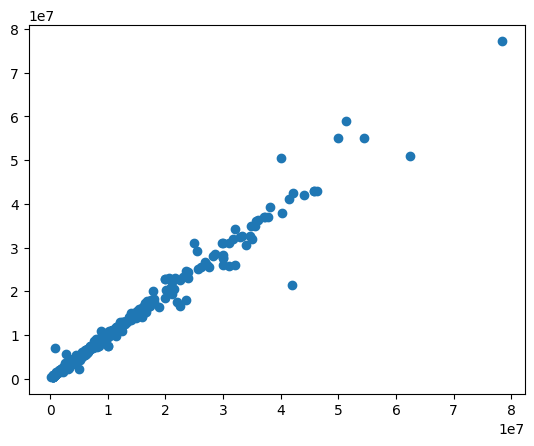

In [47]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [48]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
134,9187000,9212000.0,-25000.0
785,3589000,3589000.0,0.0
1606,1955000,1997000.0,-42000.0
1988,4550000,4225000.0,325000.0
1128,9000000,9100000.0,-100000.0
...,...,...,...
1053,2599000,2600000.0,-1000.0
1620,3589000,3589000.0,0.0
2318,40300000,38000000.0,2300000.0
2236,20000000,22799999.0,-2799999.0


In [49]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.9784885585263061
mean_absolute_error = 424086.1450662739
mean_squared_error = 1813962057211.4202
mean_absolute_percentage_error = 0.050828574846854054


In [50]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=20).fit(X_train,y_train)

In [51]:
neigh.score(X_train, y_train)

0.8892907091792484

In [52]:
neigh.score(X_test, y_test)

0.9301419162581807

In [53]:
y_pred = neigh.predict(X_test)

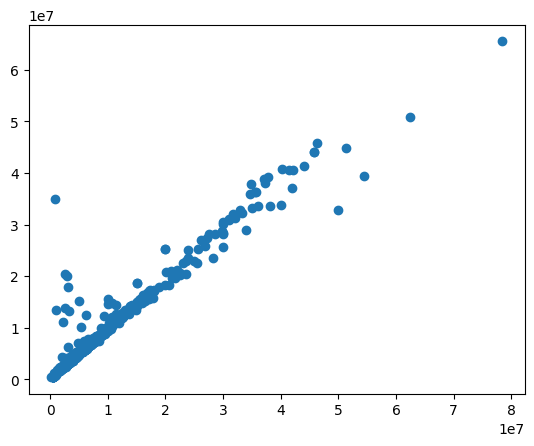

In [54]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [55]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
134,9187000,9237600.00,-50600.00
785,3589000,3562550.00,26450.00
1606,1955000,2052149.95,-97149.95
1988,4550000,4123900.00,426100.00
1128,9000000,8782749.90,217250.10
...,...,...,...
1053,2599000,2766799.95,-167799.95
1620,3589000,3562550.00,26450.00
2318,40300000,40734999.70,-434999.70
2236,20000000,25244999.90,-5244999.90


In [56]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.9301419162581807
mean_absolute_error = 716465.0241531665
mean_squared_error = 5890814590557.421
mean_absolute_percentage_error = 0.18396464749273878


In [57]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression().fit(X_train, y_train)

In [58]:
Lin_reg.score(X_test,y_test)

0.5787548865173366

In [59]:
Lin_reg.score(X_train, y_train)

0.7480872128325471

In [60]:
y_pred = Lin_reg.predict(X_test)

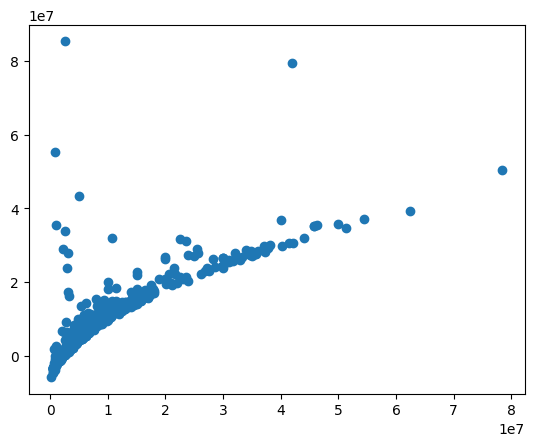

In [61]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [62]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
134,9187000,1.061861e+07,-1.431610e+06
785,3589000,3.135941e+06,4.530589e+05
1606,1955000,-3.924309e+05,2.347431e+06
1988,4550000,8.189780e+06,-3.639780e+06
1128,9000000,9.995282e+06,-9.952817e+05
...,...,...,...
1053,2599000,2.298971e+05,2.369103e+06
1620,3589000,3.135941e+06,4.530589e+05
2318,40300000,2.991009e+07,1.038991e+07
2236,20000000,2.619980e+07,-6.199798e+06


In [63]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.5787548865173366
mean_absolute_error = 2452945.9860791625
mean_squared_error = 35521685219361.34
mean_absolute_percentage_error = 0.7899165672180258


In [64]:
import pickle  # picking model for deployment

In [65]:
# first we dump our model data and the deatures scaled data using pickle

pickle.dump(Etree_reg,open('Etree_regmodel.pkl','wb'))

In [66]:
# Save the encoders using pickle
with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [67]:
# once ppickle files are created lets load the data and test them
pickled_model =  pickle.load(open('Etree_regmodel.pkl','rb'))

In [68]:
# we will also scale the features using encoders.pkl
scaled_model = pickle.load(open('encoders.pkl','rb'))

In [69]:
#Finally we will go for predictions
pred_data = pickled_model.predict(x[0:1])
pred_data

array([6165090.])

In [70]:
print(x[0:1])

   Location  Area  Prc_Sqft  Status  Bathrooms
0       136  1500      4133       3          2


## ExtraTreesRegressor
r2_score = 0.993711916507015

mean_absolute_error = 150938.85877270493

mean_squared_error = 530245492046.68463

mean_absolute_percentage_error = 0.03871749804218044

## RandomForestRegressor
r2_score = 0.9843327999652348

mean_absolute_error = 258827.49036818848

mean_squared_error = 1321143747645.161

mean_absolute_percentage_error = 0.038827693485731014

## DecisionTreeRegressor

r2_score = 0.9784885585263061

mean_absolute_error = 424086.1450662739

mean_squared_error = 1813962057211.4202

mean_absolute_percentage_error = 0.050828574846854054

## KNeighborsRegressor

r2_score = 0.9301419162581807

mean_absolute_error = 716465.0241531665

mean_squared_error = 5890814590557.421

mean_absolute_percentage_error = 0.18396464749273878

## LinearRegression

r2_score = 0.5787548865173366

mean_absolute_error = 2452945.9860791625

mean_squared_error = 35521685219361.34

mean_absolute_percentage_error = 0.7899165672180258


# conclusion

### ExtraTreesRegressor has the highest R2 score, indicating that it explains the most variance in the dependent variable. Additionally, it has the lowest RMSE and MSE values, suggesting smaller prediction errors compared to the other models.

### Considering all above metrics, ExtraTreesRegressor performs the best overall. It provides a good fit to the data, with higher explanatory power, smaller prediction errors, and better score. Therefore, based on these metrics, We can conclude that ExtraTreesRegressor is the best model among these models.